    About the data: 
    Let’s consider a Company dataset with around 10 variables and 400 records. 
    The attributes are as follows: 
    - Sales -- Unit sales (in thousands) at each location
    - Competitor Price -- Price charged by competitor at each location
    - Income -- Community income level (in thousands of dollars)
    - Advertising -- Local advertising budget for company at each location (in thousands of dollars)
    - Population -- Population size in region (in thousands)
    - Price -- Price company charges for car seats at each site
    - Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
    - Age -- Average age of the local population
    - Education -- Education level at each location
    - Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
    - US -- A factor with levels No and Yes to indicate whether the store is in the US or not
 

Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


### Importing the Required Libraries and Reading the data file

In [1]:
# Importing the basic libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# importing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset
company = pd.read_csv("Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Performing EDA on the dataset

In [3]:
# to get the information of the datafile
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
# summarizing the datafile
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
# to check the null values of the data
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
print("Dimensions -",company.shape)
print("Column names -",company.columns)

Dimensions - (400, 11)
Column names - Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')


In [7]:
# summarising the information using crosstab
pd.crosstab(company['US'],company['ShelveLoc'])

ShelveLoc,Bad,Good,Medium
US,,,
No,34,24,84
Yes,62,61,135


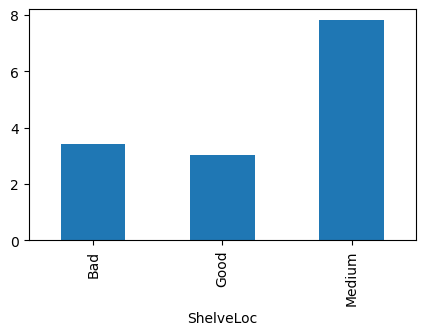

In [8]:
# Plotting barplot using crosstab function
plt.figure(figsize=(5,3))
pd.crosstab(company['Advertising'],company['ShelveLoc']).mean().plot(kind='bar');

In [9]:
# to check the dimensions of duplicates in the data
company[company.duplicated()].shape

(0, 11)

#### Encoding the Categorical Variables

In [10]:
# Changing the datatype of the varibles from object to category to perform label encoding
company[['ShelveLoc','US','Urban']] = company[['ShelveLoc','US',
                                                       'Urban']].astype('category')
company1 = company
company1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [11]:
# label Encoding using cat.codes
company1['ShelveLoc'] = company1['ShelveLoc'].cat.codes
company1['US'] = company1['US'].cat.codes
company1['Urban'] = company1['Urban'].cat.codes

company1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


#### Now, creating a class based on the mean  the variable 'Sales' is continuous 

In [12]:
# to get the mean, minimum and maximum values of the variable 'Sales'
print("Mean : ",company1["Sales"].mean(), 
      "\nMin : ",company1["Sales"].min(), 
      "\nMax : ",company1["Sales"].max())

Mean :  7.496325000000001 
Min :  0.0 
Max :  16.27


#### Let's now assume;
#### If Sales <= 7.50 as “Low_Sale=0” and others as “High_Sale=1”

In [13]:
# using the mean value so that we can create a class for 'Sales' variable as low_sales and high_sales
company1["sales"] = pd.cut(company1["Sales"], bins=[0, 7.50, 16.27], labels=["Low_Sale","High_Sale"])
company1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,High_Sale
1,11.22,111,48,16,260,83,1,65,10,1,1,High_Sale
2,10.06,113,35,10,269,80,2,59,12,1,1,High_Sale
3,7.40,117,100,4,466,97,2,55,14,1,1,Low_Sale
4,4.15,141,64,3,340,128,0,38,13,1,0,Low_Sale


In [14]:
# label encoding for the 'sales' column
company2 = pd.get_dummies(company1.iloc[:,1:], columns=["sales"], drop_first=True)
company2.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_High_Sale
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


### Normalization of the data

In [15]:
def norm_func (i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

comp_norm = norm_func(company2)
comp_norm.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_High_Sale
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0,0.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0,0.0


### Train and Test Split
    Splitting the data into Train and Test data

In [16]:
X = comp_norm.drop(["sales_High_Sale"], axis = 1)
y = comp_norm["sales_High_Sale"]

In [17]:
print(X.head())
print('\n\n',y.head())

   CompPrice    Income  Advertising  Population     Price  ShelveLoc  \
0   0.622449  0.525253     0.379310    0.533066  0.574850        0.0   
1   0.346939  0.272727     0.551724    0.501002  0.353293        0.5   
2   0.367347  0.141414     0.344828    0.519038  0.335329        1.0   
3   0.408163  0.797980     0.137931    0.913828  0.437126        1.0   
4   0.653061  0.434343     0.103448    0.661323  0.622754        0.0   

        Age  Education  Urban   US  
0  0.309091      0.875    1.0  1.0  
1  0.727273      0.000    1.0  1.0  
2  0.618182      0.250    1.0  1.0  
3  0.545455      0.500    1.0  1.0  
4  0.236364      0.375    1.0  0.0  


 0    1.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: sales_High_Sale, dtype: float64


In [18]:
# Splitting the data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=0)

## Building Model

### Building Decision Tree Classifier using Entropy Criteria (C5.0)

In [19]:
# fitting the decision tree classifier model on the training data
model_entro= DecisionTreeClassifier(criterion='entropy', max_depth=4)
model_entro.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

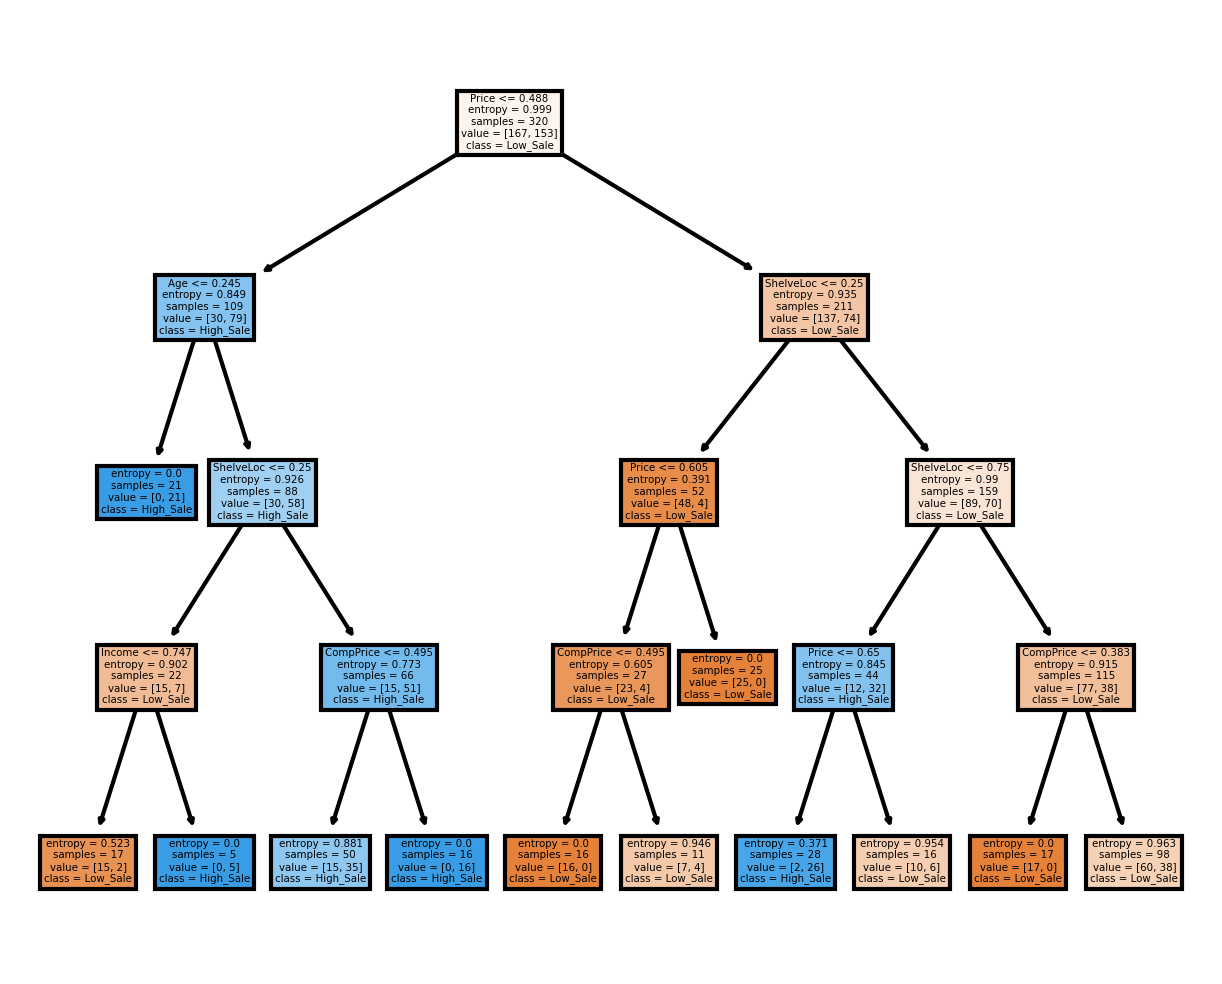

In [20]:
# to plot the decision tree
f_name = ['CompPrice','Income','Advertising','Population','Price',
          'ShelveLoc','Age','Education','Urban','US']
cn = ["Low_Sale", "High_Sale"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=300)
tree.plot_tree(model_entro, feature_names=f_name, class_names=cn, filled=True);

In [21]:
# to get the decision tree plot in the text format for easy understanding 
text = tree.export_text(model_entro, max_depth=4)
print(text)

|--- feature_4 <= 0.49
|   |--- feature_6 <= 0.25
|   |   |--- class: 1.0
|   |--- feature_6 >  0.25
|   |   |--- feature_5 <= 0.25
|   |   |   |--- feature_1 <= 0.75
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_1 >  0.75
|   |   |   |   |--- class: 1.0
|   |   |--- feature_5 >  0.25
|   |   |   |--- feature_0 <= 0.49
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_0 >  0.49
|   |   |   |   |--- class: 1.0
|--- feature_4 >  0.49
|   |--- feature_5 <= 0.25
|   |   |--- feature_4 <= 0.60
|   |   |   |--- feature_0 <= 0.49
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_0 >  0.49
|   |   |   |   |--- class: 0.0
|   |   |--- feature_4 >  0.60
|   |   |   |--- class: 0.0
|   |--- feature_5 >  0.25
|   |   |--- feature_5 <= 0.75
|   |   |   |--- feature_4 <= 0.65
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_4 >  0.65
|   |   |   |   |--- class: 0.0
|   |   |--- feature_5 >  0.75
|   |   |   |--- feature_0 <= 0.38
|   |   |   |   |--- class: 0.0
|   |

In [22]:
# to get the important features of the model
#model_entro.feature_importances_
f_imp = pd.Series(model_entro.feature_importances_, index=f_name).sort_values(ascending=False)
f_imp

Price          0.333080
ShelveLoc      0.330473
CompPrice      0.174582
Age            0.081289
Income         0.080575
Advertising    0.000000
Population     0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

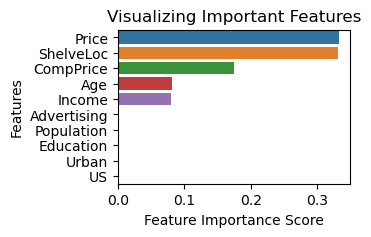

In [23]:
# to visualize the important features 
%matplotlib inline
# creating a bar plot
plt.figure(figsize=(3,2))
sns.barplot(x=f_imp, y=f_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [24]:
# Predictions on the test data
preds = model_entro.predict(X_test)
# getting the count of each category
pd.Series(preds).value_counts()

0.0    48
1.0    32
dtype: int64

In [25]:
# using crosstab function to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0.0,1.0
sales_High_Sale,,
0.0,30,5
1.0,18,27


In [26]:
# to get the Accuracy 
np.mean(preds==y_test)*100

71.25

In [27]:
# to get the classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.62      0.86      0.72        35
         1.0       0.84      0.60      0.70        45

    accuracy                           0.71        80
   macro avg       0.73      0.73      0.71        80
weighted avg       0.75      0.71      0.71        80



### Building Decision Tree Classifier using Gini Criteria (CART)

In [28]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4)
model_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

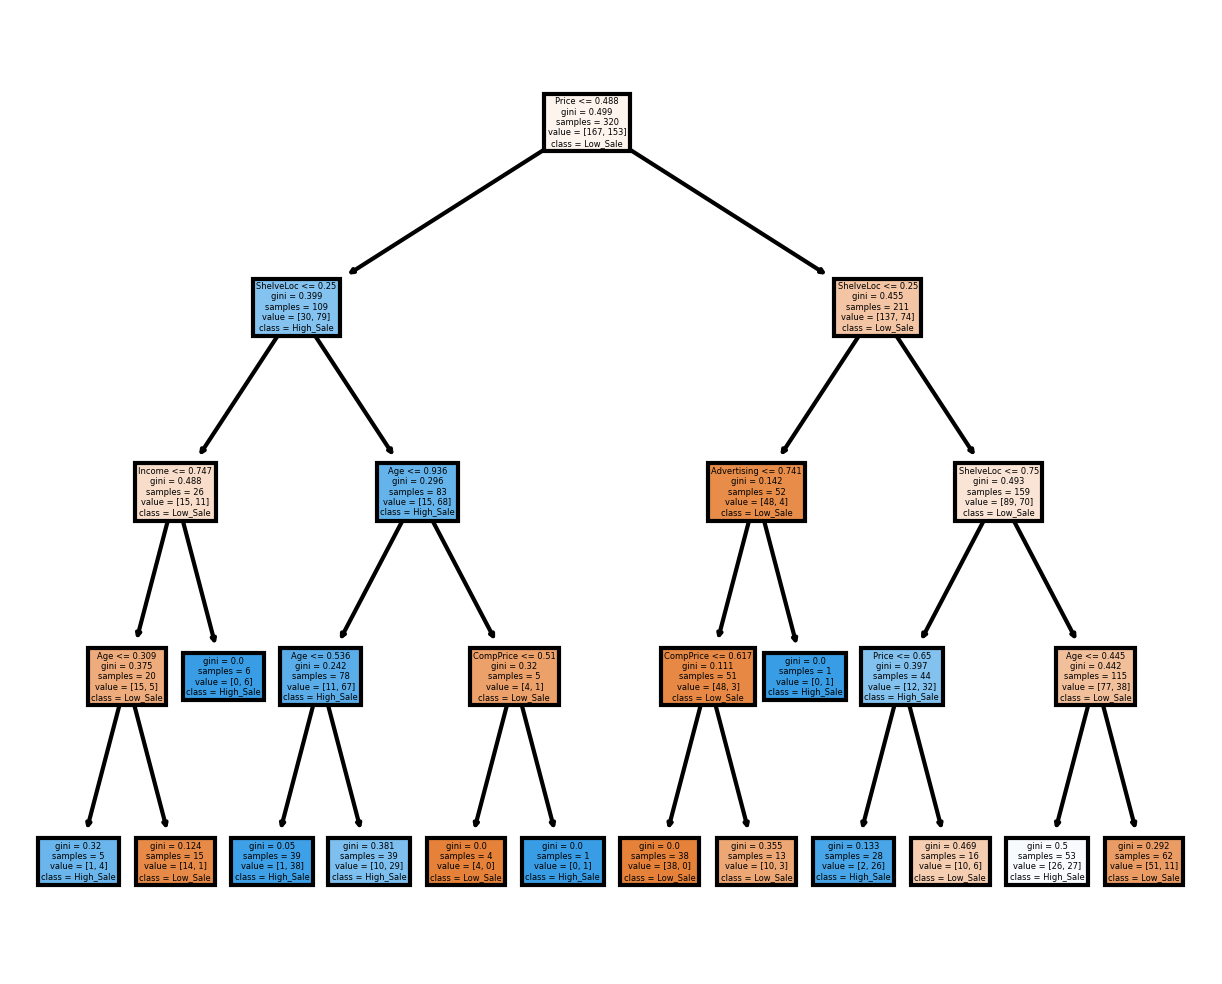

In [29]:
# to plot the decision tree
f_name = ['CompPrice','Income','Advertising','Population','Price',
          'ShelveLoc','Age','Education','Urban','US']
cn = ["Low_Sale", "High_Sale"]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,4), dpi=300)
tree.plot_tree(model_gini, feature_names=f_name, class_names=cn, filled=True);

In [30]:
# to get the important features of the model
#model_entro.feature_importances_
f_imp_ = pd.Series(model_gini.feature_importances_, index=f_name).sort_values(ascending=False)
f_imp_

ShelveLoc      0.336554
Price          0.333626
Age            0.208771
Income         0.065734
CompPrice      0.033317
Advertising    0.021997
Population     0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

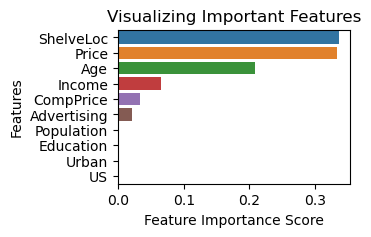

In [31]:
# to visualize the important features 
%matplotlib inline
# creating a bar plot
plt.figure(figsize=(3,2))
sns.barplot(x=f_imp_, y=f_imp_.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [32]:
# Predictions on the test data
pred = model_gini.predict(X_test)
# getting the count of each category
pd.Series(pred).value_counts()

0.0    40
1.0    40
dtype: int64

In [33]:
# to get the Accuracy 
np.mean(pred==y_test)*100

71.25

In [34]:
# to get the classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.65      0.74      0.69        35
         1.0       0.78      0.69      0.73        45

    accuracy                           0.71        80
   macro avg       0.71      0.72      0.71        80
weighted avg       0.72      0.71      0.71        80



### Conclusion
- The decision tree model is prepared on company data treating those who have sales <= 7.50 as "Low_Sale" and others are "High_Sale", in order to know about the attributes that cause high sales.
- We have prepared two models using both Entropy and Gini Impurity methods.
- We got same accuracy score for both the models as 71.25%.